In [69]:
import pandas as pd
import numpy as np

In [70]:
# load data
def load_data(path, method_name):
    df = pd.read_csv(path)
    mean_df = df.groupby(np.arange(len(df))//100).mean()
    mean_df["method"] = method_name
    return mean_df

In [71]:
# df = pd.read_csv(path)
# mean_df = df.groupby(np.arange(len(df))//10).mean()
# mean_df["method"] = "Base"

In [72]:
base_df = load_data('./base_res.csv', "Base")
laplacian_df = load_data('./laplacian_res.csv', "Laplacian")
vertical_df = load_data('./vertical_res.csv', "Vertical")
gaussian_df = load_data('./gaussian2_res.csv', "Gaussian")

In [73]:
foo = pd.concat([base_df,laplacian_df,vertical_df,gaussian_df])
foo

,reward,method
0,17.28,Base
1,17.28,Base
2,17.63,Base
3,16.98,Base
4,17.03,Base
5,17.42,Base
6,17.36,Base
7,17.24,Base
8,17.50,Base
9,17.44,Base


In [92]:
for row in foo.values:
    print(row[1][0] + " & " + str(row[0]) + "\t\\\\")

B & 17.28	\\
B & 17.28	\\
B & 17.63	\\
B & 16.98	\\
B & 17.03	\\
B & 17.42	\\
B & 17.36	\\
B & 17.24	\\
B & 17.5	\\
B & 17.44	\\
L & 16.55	\\
L & 16.85	\\
L & 17.54	\\
L & 16.81	\\
L & 16.85	\\
L & 16.55	\\
L & 17.02	\\
L & 16.79	\\
L & 16.73	\\
L & 16.69	\\
V & 19.48	\\
V & 19.5	\\
V & 19.34	\\
V & 19.42	\\
V & 19.5	\\
V & 19.34	\\
V & 19.36	\\
V & 19.32	\\
V & 19.52	\\
V & 19.42	\\
G & 15.61	\\
G & 15.8	\\
G & 15.87	\\
G & 15.28	\\
G & 15.54	\\
G & 15.87	\\
G & 16.52	\\
G & 15.78	\\
G & 15.61	\\
G & 15.78	\\


In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('reward ~ C(method)', data = foo).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df    sum_sq    mean_sq           F        PR(>F)
C(method)   3.0  70.56356  23.521187  408.503657  7.593288e-28
Residual   36.0   2.07284   0.057579         NaN           NaN


In [75]:
import scipy.stats as stats

In [77]:
stat, p = stats.f_oneway(foo['reward'][foo['method']=='Base'],
               foo['reward'][foo['method']=='Laplacian'],
               foo['reward'][foo['method']=='Vertical'],
                         foo['reward'][foo['method']=='Gaussian']
              )

In [78]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=408.504, p=0.000
Different distributions (reject H0)


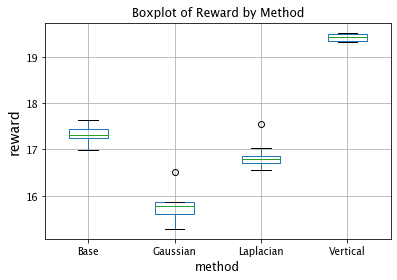

In [84]:
import matplotlib.pyplot as plt
foo.boxplot('reward', by = 'method')
plt.title("Boxplot of Reward by Method")
plt.suptitle('') # that's what you're after
plt.xlabel('method', fontsize=12)
plt.ylabel('reward', fontsize=14)
fig1 = plt.gcf()
plt.show()
fig1.savefig("boxplot.png")